import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
dt=pd.read_csv("Diabetes.csv")

In [25]:
dt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [253]:
x=dt.drop("Outcome",axis=1).values
y=dt["Outcome"].values

In [254]:
x.shape

(768, 8)

In [255]:
y.shape

(768,)

# How to shuffel the data.
in this dataset shuffel is not mandatory, just doing as per practise

In [170]:
dt=pd.DataFrame(x,columns=dt.columns[0:9])

ValueError: Shape of passed values is (768, 8), indices imply (768, 9)

In [ ]:
dt=dt.values

In [152]:
dt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [153]:
np.random.shuffle(dt)

KeyError: 125

In [154]:
dt.shape

(768, 9)

In [156]:
x.shape

(768, 8)

In [113]:
y=dt[:,-1]

In [114]:
y.shape

(768,)

# Feature Scalling

In [157]:
dt.isnull().sum() #Just checking is there any null value

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Standardization

In [172]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [173]:
x=sc.fit_transform(x)

In [174]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [164]:
x.shape

(768, 8)

In [175]:
y.shape

(768,)

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [183]:
x_train.shape
y_train.shape

(537,)

In [182]:
x_test.shape
y_test.shape

(231,)

In [184]:
from sklearn.neighbors import KNeighborsClassifier

In [185]:
model=KNeighborsClassifier()

In [186]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [187]:
pred=model.predict(x_test)

In [188]:
pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [189]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [190]:
np.where(pred!=y_test)

(array([  0,   2,   3,  14,  15,  16,  20,  21,  23,  27,  34,  36,  40,
         41,  42,  48,  49,  52,  54,  57,  58,  63,  65,  66,  69,  70,
         73,  79,  84,  87,  91, 102, 106, 109, 111, 114, 117, 125, 127,
        128, 131, 132, 135, 136, 142, 147, 148, 149, 150, 152, 157, 158,
        161, 163, 165, 167, 170, 173, 175, 178, 179, 185, 191, 195, 198,
        200, 202, 203, 204, 206, 209, 212, 213, 223, 224, 225, 226],
       dtype=int64),)

# Check accuracy

In [194]:
from sklearn.metrics import accuracy_score

In [195]:
accuracy_score(pred,y_test)

0.6666666666666666

In [197]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, pred, [0, 1])

In [198]:
con_mat

array([[120,  24],
       [ 53,  34]], dtype=int64)

In [200]:
from sklearn.metrics import classification_report
classification_report(pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.83      0.69      0.76       173\n           1       0.39      0.59      0.47        58\n\n    accuracy                           0.67       231\n   macro avg       0.61      0.64      0.61       231\nweighted avg       0.72      0.67      0.68       231\n'

# Lets try putting different K value

In [204]:
lst=[]
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    lst.append(np.mean(pred))

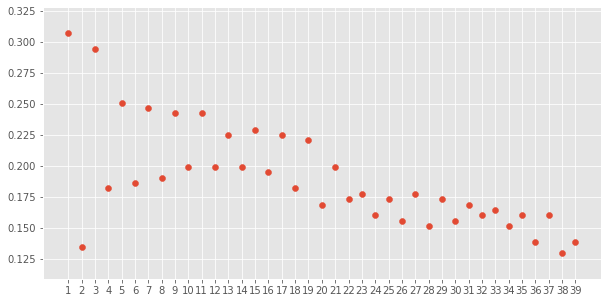

In [215]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.scatter(range(1,40),lst)
plt.xticks(range(1,40))
plt.show()

In [228]:
model=KNeighborsClassifier(n_neighbors=36)
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [229]:
np.where(pred!=y_test)

(array([  3,   7,  14,  16,  20,  23,  25,  27,  28,  34,  36,  40,  41,
         42,  44,  48,  63,  66,  69,  71,  73,  77,  79,  84,  91, 101,
        102, 106, 109, 111, 114, 117, 125, 127, 131, 135, 137, 139, 142,
        144, 148, 149, 150, 154, 158, 161, 163, 165, 167, 170, 175, 177,
        178, 179, 185, 191, 192, 195, 202, 203, 206, 208, 209, 212, 224],
       dtype=int64),)

In [231]:
accuracy_score(pred,y_test)

0.7186147186147186

In [232]:
classification_report(pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.97      0.70      0.81       199\n           1       0.31      0.84      0.45        32\n\n    accuracy                           0.72       231\n   macro avg       0.64      0.77      0.63       231\nweighted avg       0.87      0.72      0.76       231\n'

In [233]:
con_mat = confusion_matrix(y_test, pred, [0, 1])
con_mat

array([[139,   5],
       [ 60,  27]], dtype=int64)

# Normalization

In [262]:
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler(feature_range=(0, 1))

In [263]:
x=mm.fit_transform(x)

In [264]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [265]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [266]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [267]:
pred=model.predict(x_test)

In [268]:
accuracy_score(pred,y_test)

0.683982683982684

# Lets try through using Feature selection

In [272]:
x=dt.values
x=x[:,:-1]

In [274]:
x.shape

(768, 8)

In [275]:
x # using 

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

# Using visualization.

In [280]:
columns=dt.columns.to_list()
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [282]:
x[:,[0,1]] # pregnancies

array([[  6., 148.],
       [  1.,  85.],
       [  8., 183.],
       ...,
       [  5., 121.],
       [  1., 126.],
       [  1.,  93.]])

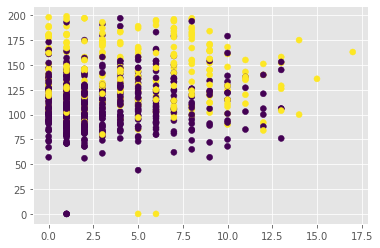

In [288]:
plt.scatter(x[:,0],x[:,1],c=y)

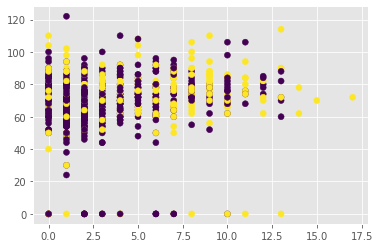

In [289]:
plt.scatter(x[:,0],x[:,2],c=y)

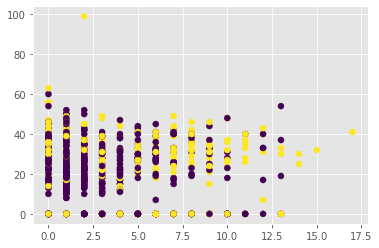

In [290]:
plt.scatter(x[:,0],x[:,3],c=y)

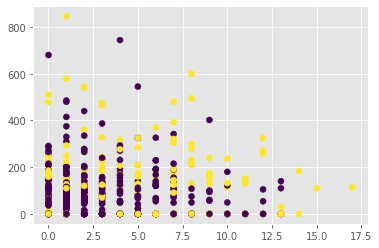

In [291]:
plt.scatter(x[:,0],x[:,4],c=y)

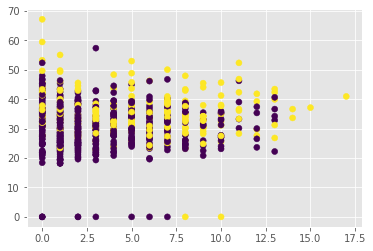

In [292]:
plt.scatter(x[:,0],x[:,5],c=y)

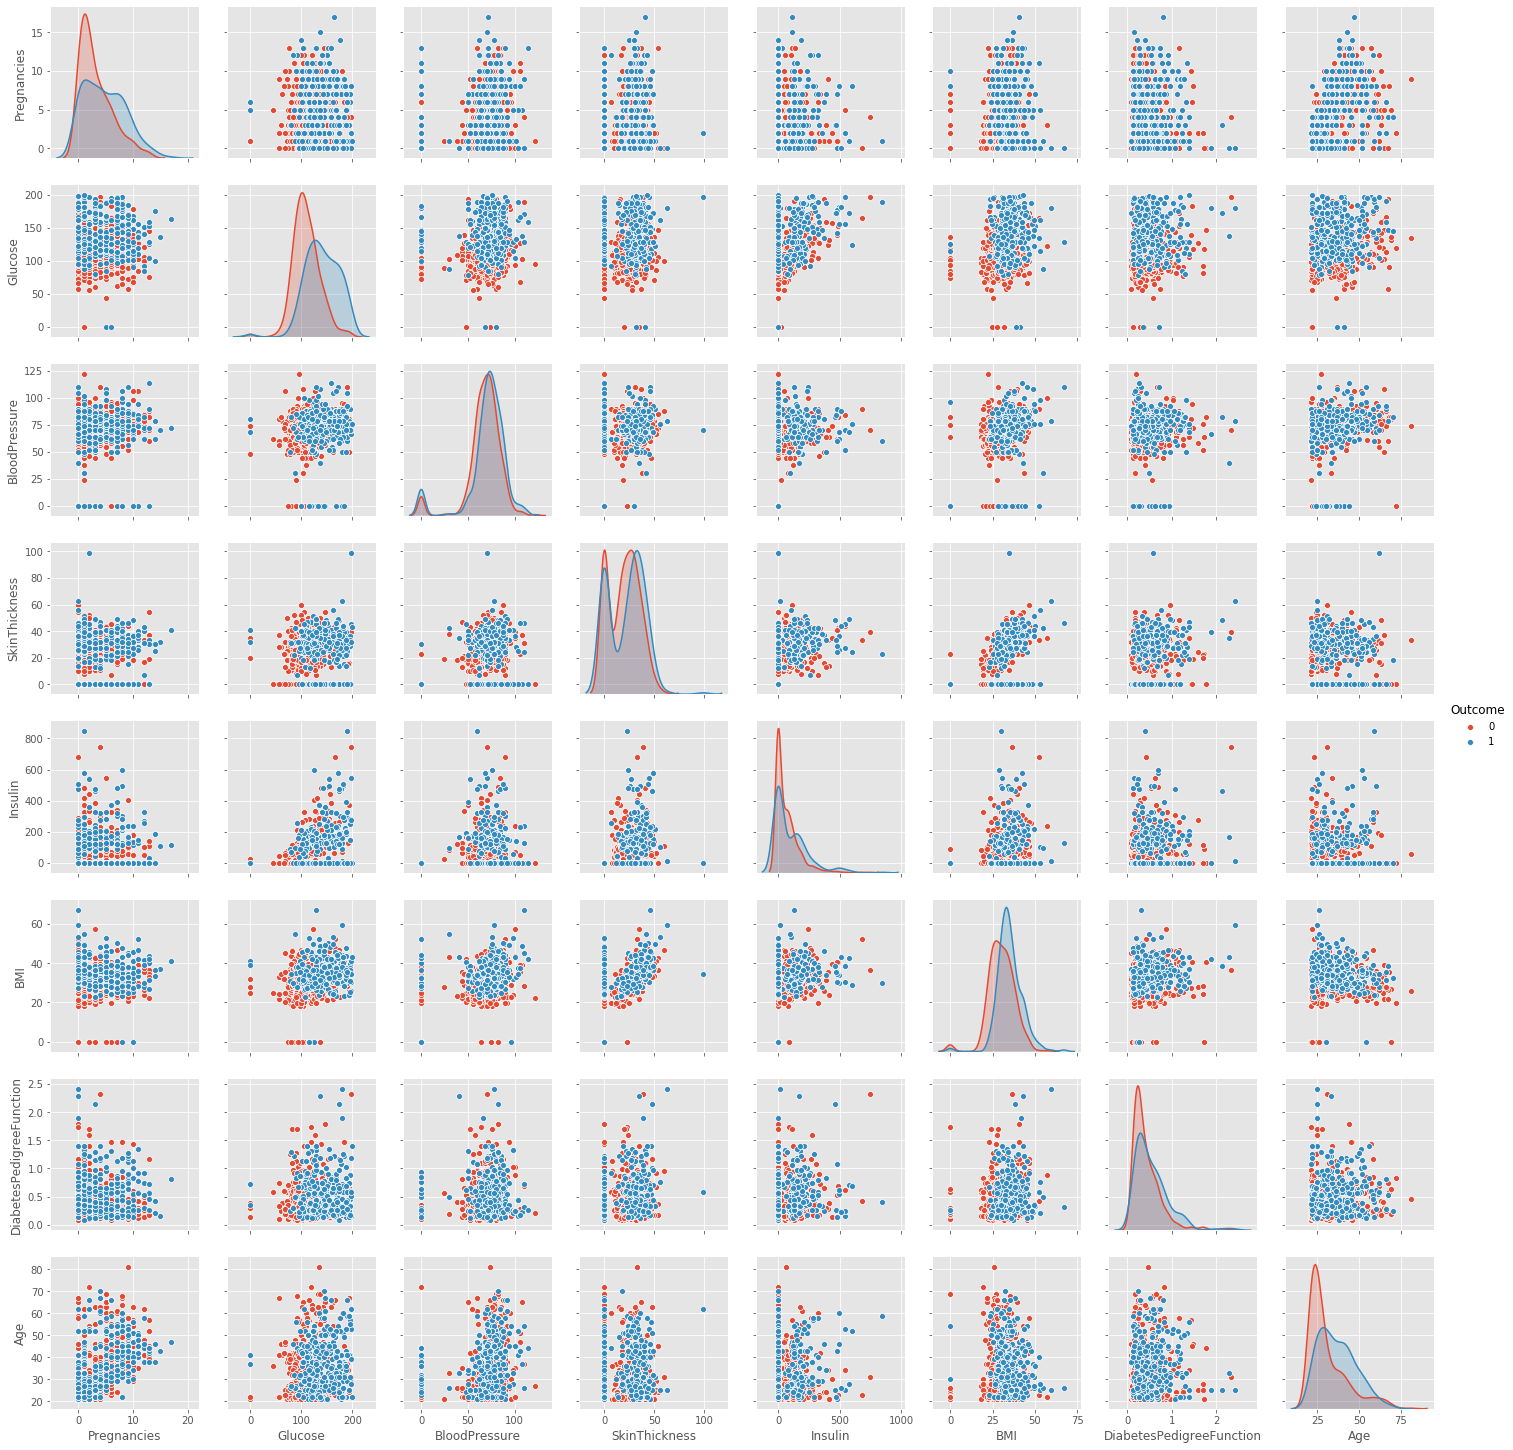

In [298]:
import seaborn as sns
sns.pairplot(dt,hue='Outcome') #will take time
plt.show()

In [30]:
dt.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [26]:
x=dt[["BMI","Age"]].values
y=dt["Outcome"].values

In [28]:
x.shape

(768, 2)

In [29]:
y.shape

(768,)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [20]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
pred=model.predict(x_test)

In [1]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

NameError: name 'pred' is not defined